# 6.2 Exploring relationships

TABLE OF CONTENT
  1. Importing Visualization Libraries and Data
  2. Pick Variables
  3. Exploring Relationships
      3.1. Correlations
      3.2. Scatterplots
        3.2.1 Price vs Accommodates
        3.2.2 Number of Reviews vs Min. Nights
      3.3. Pair Plots
      3.4 Categorical Plots
        3.4.1 Price & Accomodates 
        3.4.2 Price and Review Scores
        3.4.3 Price & Minimum Nights
        3.4.3 Minimum Nights & Number of Reviews
   4. Questions
   5. Hyothesis
   6. Export Dataset

# 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

import warnings
warnings.simplefilter("ignore")

In [2]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Define path
path = r'/Users/Dulce/Dec2024 - Airbnb Berlin'

In [4]:
# Import data
final_df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Final_df.pkl'))

In [5]:
# Create a color palette with distinct colors
colors = ['#FFB6C1', '#FF89AA', '#FF2F7B', '#FF6B9A']

In [6]:
final_df.head()

,id,date,month,available,season,name,host_id,host_name,neighbourhood_group,neighbourhood,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,Population,Deficit housing
0,22438,2024-01-01,January,f,Winter,Rental unit in Berlin ¬∑ ‚òÖ4.70 ¬∑ 2 bedrooms...,86159,Javier,Mitte,Brunnenstr. Sued,...,4.7,4.76,4.7,4.82,4.73,4.63,4.68,f,385748,-19725
1,22438,2024-02-01,January,t,Winter,Rental unit in Berlin ¬∑ ‚òÖ4.70 ¬∑ 2 bedrooms...,86159,Javier,Mitte,Brunnenstr. Sued,...,4.7,4.76,4.7,4.82,4.73,4.63,4.68,f,385748,-19725
2,22438,2024-03-01,January,t,Winter,Rental unit in Berlin ¬∑ ‚òÖ4.70 ¬∑ 2 bedrooms...,86159,Javier,Mitte,Brunnenstr. Sued,...,4.7,4.76,4.7,4.82,4.73,4.63,4.68,f,385748,-19725
3,22438,2024-04-01,January,t,Winter,Rental unit in Berlin ¬∑ ‚òÖ4.70 ¬∑ 2 bedrooms...,86159,Javier,Mitte,Brunnenstr. Sued,...,4.7,4.76,4.7,4.82,4.73,4.63,4.68,f,385748,-19725
4,22438,2024-05-01,January,t,Winter,Rental unit in Berlin ¬∑ ‚òÖ4.70 ¬∑ 2 bedrooms...,86159,Javier,Mitte,Brunnenstr. Sued,...,4.7,4.76,4.7,4.82,4.73,4.63,4.68,f,385748,-19725


In [7]:
final_df.columns

Index(['id', 'date', 'month', 'available', 'season', 'name', 'host_id',
       'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'calculated_host_listings_count',
       'availability_365', 'license', 'host_response_time',
       'host_response_rate', 'host_is_superhost', 'property_type',
       'accommodates', 'maximum_nights', 'first_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'Population',
       'Deficit housing'],
      dtype='object')

In [8]:
# Change data types
columns_to_convert = ['minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365', 'accommodates', 'maximum_nights']
final_df[columns_to_convert] = final_df[columns_to_convert].astype('int')
final_df[columns_to_convert].dtypes

minimum_nights                    int64
number_of_reviews                 int64
calculated_host_listings_count    int64
availability_365                  int64
accommodates                      int64
maximum_nights                    int64
dtype: object

# 2. Pick Variables

In [9]:
# Create a subset with only the numerical columns
final_selected = final_df[['id','price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365', 'accommodates', 'maximum_nights', 'review_scores_rating']]
final_selected.head()

,id,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,accommodates,maximum_nights,review_scores_rating
0,22438,53.0,93,182,1,349,2,365,4.7
1,22438,53.0,93,182,1,349,2,365,4.7
2,22438,53.0,93,182,1,349,2,365,4.7
3,22438,53.0,93,182,1,349,2,365,4.7
4,22438,53.0,93,182,1,349,2,365,4.7


In [10]:
final_selected.shape

(60730, 9)

# 3. Exploring Relationships

## 3.1. Correlations:

In [11]:
# Create a correlation matrix using pandas
final_selected.corr()

,id,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,accommodates,maximum_nights,review_scores_rating
id,1.000000,-0.157477,-0.190390,0.129284,0.176570,0.168762,-0.086429,0.149769,-0.167515
price,-0.157477,1.000000,-0.051189,-0.032724,-0.131427,-0.037141,0.541612,0.043949,0.120542
minimum_nights,-0.190390,-0.051189,1.000000,-0.310521,-0.060895,-0.168034,-0.067358,0.142923,-0.062990
number_of_reviews,0.129284,-0.032724,-0.310521,1.000000,0.059992,-0.004550,-0.039133,-0.148957,0.150260
calculated_host_listings_count,0.176570,-0.131427,-0.060895,0.059992,1.000000,0.207647,-0.016347,0.055278,-0.187232
availability_365,0.168762,-0.037141,-0.168034,-0.004550,0.207647,1.000000,-0.000645,0.144331,-0.147454
accommodates,-0.086429,0.541612,-0.067358,-0.039133,-0.016347,-0.000645,1.000000,0.135436,0.032862
maximum_nights,0.149769,0.043949,0.142923,-0.148957,0.055278,0.144331,0.135436,1.000000,-0.039135
review_scores_rating,-0.167515,0.120542,-0.062990,0.150260,-0.187232,-0.147454,0.032862,-0.039135,1.000000


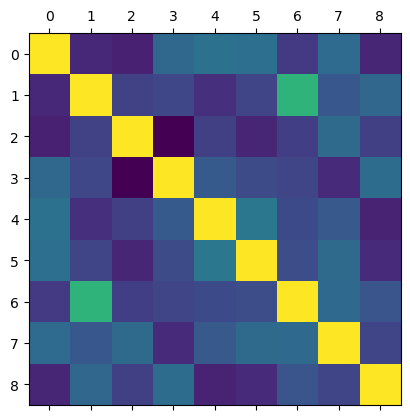

In [12]:
# Create a correlation heatmap using matplotlib
plt.matshow(final_selected.corr())
plt.show()

### Save figure
plt.matshow(df.corr())
plt.savefig("out.png") 

### This will save the image in the working directory. 
#If you don't know what this directory is the next line will show you how to check

#current dir
cwd = os.getcwd()
cwd

Text(0.5, 1.0, 'Correlation Matrix')

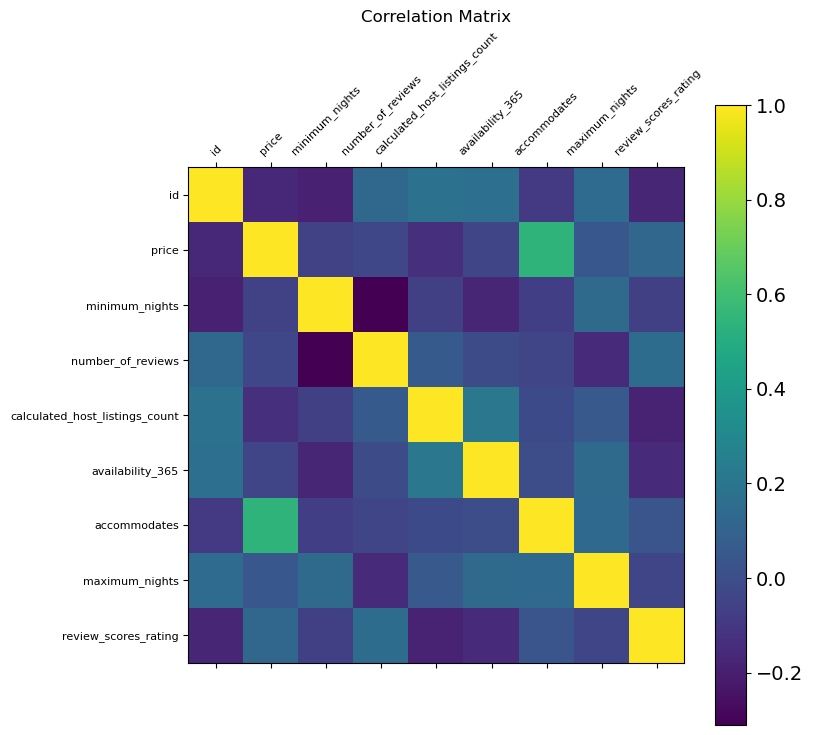

In [13]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(final_selected.corr(), fignum=f.number) # type of plot
plt.xticks(range(final_selected.shape[1]), final_selected.columns, fontsize=8, rotation=45) # x axis labels
plt.yticks(range(final_selected.shape[1]), final_selected.columns, fontsize=8) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=12) # add title

#### Create a correlation heatmap using seaborn:

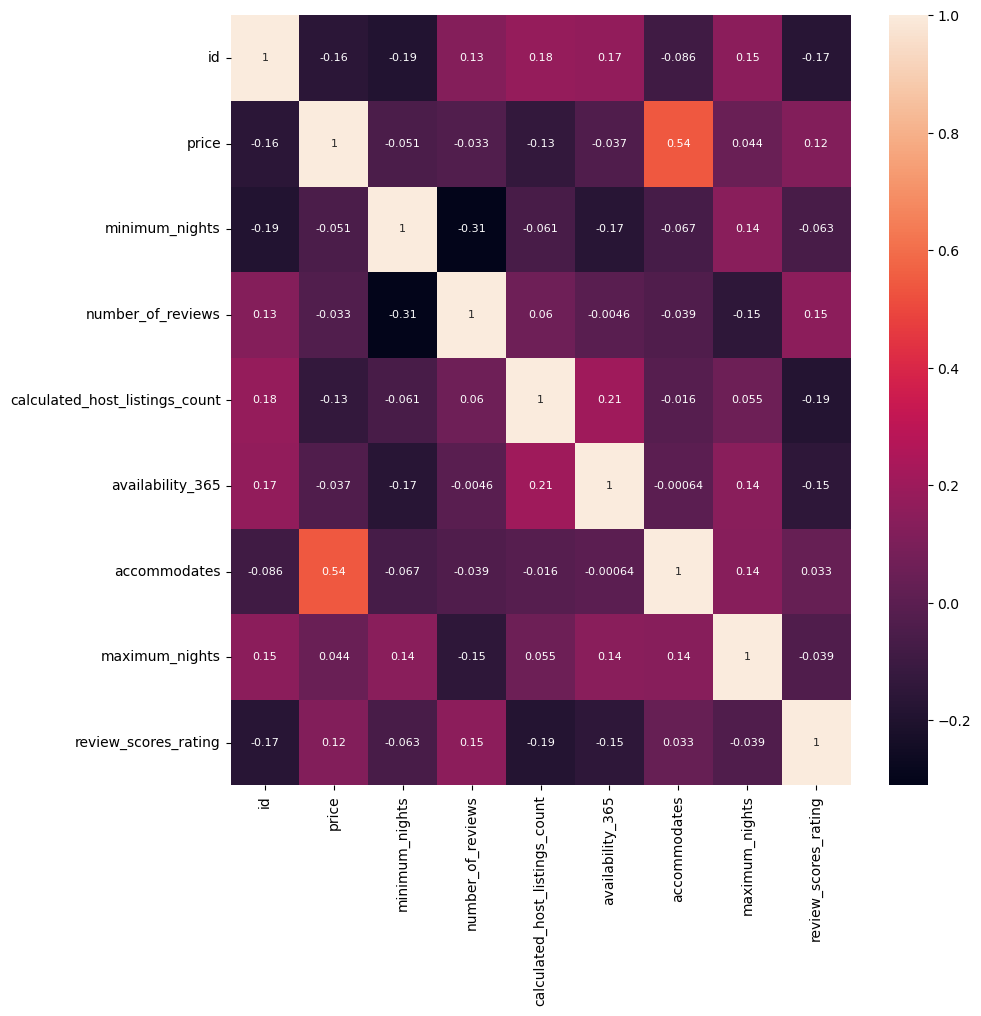

In [14]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(final_selected.corr(), annot=True, ax=ax, annot_kws={"size": 8}) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

There are two interesting relationships: price vs accommodates and number_of_reviews vs minimum_nights. The first one is a strong correlation and the second is moderate. We will investigate further. 

## 3.2. Scatterplots:

### 3.2.1 Price vs Accommodates

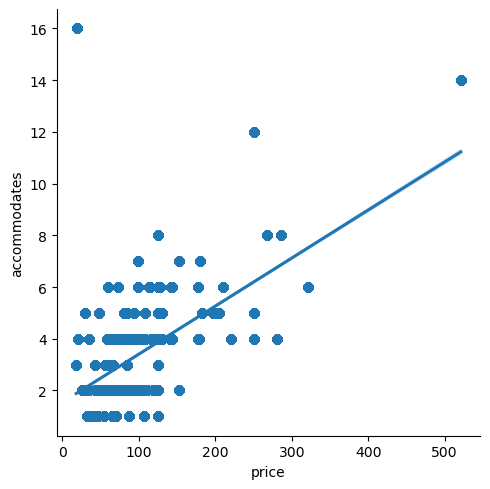

In [15]:
# Create a scatterplot for the "accommodates" and "price" columns in seaborn

sns.lmplot(x = 'price', y = 'accommodates', data = final_selected)

There is a positive and strong correletion between price and number of accomodates. However, there is a point which seems to be strange: one listing for low price and 16 accomodates. And also another one with higher price as the rest and high number of accomodations. Let´s filter:

In [16]:
# Filter by accommodates >= 14
filtered_rows = final_selected[final_selected['accommodates'] >= 14]

# Group by the 'id' column
grouped_data = filtered_rows.groupby('id').mean()

# Display the resulting grouped DataFrame
grouped_data.head()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,accommodates,maximum_nights,review_scores_rating
id,,,,,,,,
102882,521.0,3.0,104.0,2.0,0.0,14.0,1125.0,4.70
37554,19.0,95.0,8.0,1.0,0.0,16.0,730.0,4.38


The first case (id = 37554) belong to a class of long-term rental type because the minimum per nights are 3 months. However, the case id = 102882 it can be classified as long and short-rental because it is a really open case. Moreover, this host has 2 listings in the same building, so it make think this host is running a hidden business.

#### 3.2.1a Flagging

In [17]:
# Check percentiles
selected_columns = ['price', 'accommodates']
final_selected[selected_columns].describe()

,price,accommodates
count,60730.000000,60730.000000
mean,101.672787,3.437774
std,62.421489,2.140496
min,18.000000,1.000000
25%,63.000000,2.000000
50%,90.000000,3.000000
75%,124.515203,4.000000
max,521.000000,16.000000


In [18]:
# Flag for Prices
selected_columns = ['price', 'accommodates']
final_selected[selected_columns].describe()

,price,accommodates
count,60730.000000,60730.000000
mean,101.672787,3.437774
std,62.421489,2.140496
min,18.000000,1.000000
25%,63.000000,2.000000
50%,90.000000,3.000000
75%,124.515203,4.000000
max,521.000000,16.000000


In [19]:
# Create Price Range variable
final_selected.loc[final_selected['price'] < 60, 'price_range'] = 'Low-Priced'
final_selected.loc[(final_selected['price'] >= 60) & (final_selected['price'] < 120), 'price_range'] = 'Mid-Priced'
final_selected.loc[(final_selected['price'] >= 120) & (final_selected['price'] < 200), 'price_range'] = 'High-Priced'
final_selected.loc[final_selected['price'] >= 200, 'price_range'] = 'Luxus'
final_selected['price_range'].value_counts(dropna = False)

price_range
Mid-Priced     29754
High-Priced    13728
Low-Priced     13024
Luxus           4224
Name: count, dtype: int64

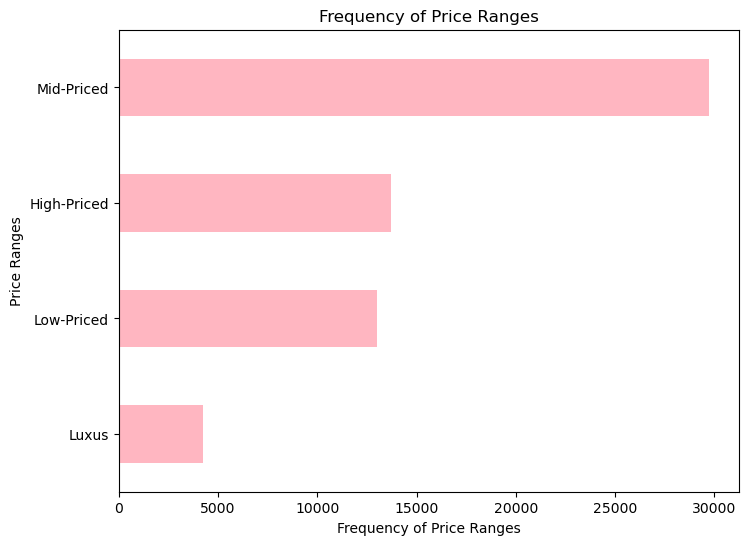

In [20]:
# Calculate the frequency of price_range and create a horizontal bar plot
bar_price_range = final_selected['price_range'].value_counts().sort_values(ascending=True).plot.barh(color=colors[0], figsize=(8, 6))

# Adding labels for the X and Y axes
plt.xlabel('Frequency of Price Ranges')
plt.ylabel('Price Ranges')

# Adding a title
plt.title('Frequency of Price Ranges')

# Show the plot
plt.show()

In [21]:
# Create Accommodates Type Range variable
final_selected.loc[final_selected['accommodates'] <= 1, 'accommodates_type'] = 'Solo-Rooms'
final_selected.loc[(final_selected['accommodates'] == 2), 'accommodates_type'] = 'Couples'
final_selected.loc[(final_selected['accommodates'] > 2) & (final_selected['accommodates'] <= 5), 'accommodates_type'] = 'Family'
final_selected.loc[final_selected['accommodates'] > 5, 'accommodates_type'] = 'Groups'
final_selected['accommodates_type'].value_counts(dropna = False)

accommodates_type
Family        25530
Couples       22880
Groups         7392
Solo-Rooms     4928
Name: count, dtype: int64

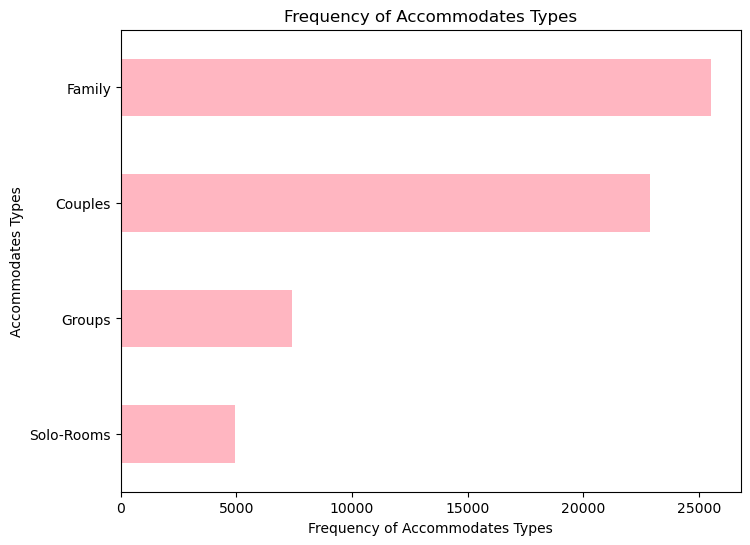

In [22]:
# Calculate the frequency of price_range and create a horizontal bar plot
bar_accommodates_type = final_selected['accommodates_type'].value_counts().sort_values(ascending=True).plot.barh(color=colors[0], figsize=(8, 6))

# Adding labels for the X and Y axes
plt.xlabel('Frequency of Accommodates Types')
plt.ylabel('Accommodates Types')

# Adding a title
plt.title('Frequency of Accommodates Types')

# Show the plot
plt.show()

In [23]:
# Group by Type of Accommodates and Price Ranges
Price_Accommodates =final_selected.groupby(['accommodates_type', 'price_range']).size().unstack()

In [24]:
# Crosstab Price_Accommodates
crosstab_Price_Accommodates_prop = pd.crosstab(index=final_selected['accommodates_type'],
                             columns=final_selected['price_range'],
                             normalize='columns')*100
crosstab_Price_Accommodates_prop

price_range,High-Priced,Low-Priced,Luxus,Mid-Priced
accommodates_type,,,,
Couples,23.076923,48.648649,0.0,44.955300
Family,53.846154,29.729730,50.0,40.848289
Groups,20.512821,2.702703,50.0,7.098205
Solo-Rooms,2.564103,18.918919,0.0,7.098205


Text(0, 0.5, 'Type of Accomodates')

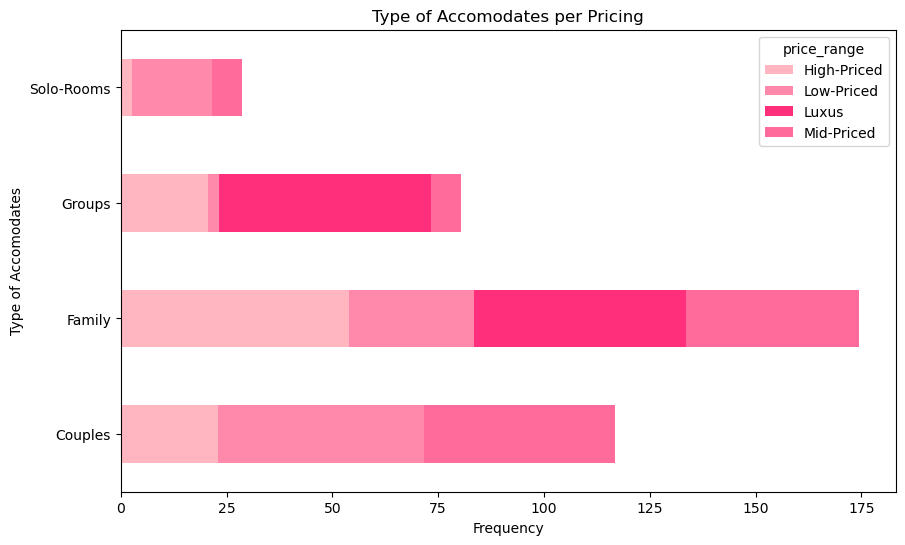

In [25]:
# Bar Chart: Type of Accommodates per Price Ranges (100% Stacked Column)
bar_Price_Accommodates = crosstab_Price_Accommodates_prop.plot.barh(stacked=True, 
                                                  title='Type of Accomodates per Pricing',
                                                  color=colors, 
                                                  figsize=(10, 6))
# Add title to axis Y
plt.xlabel('Frequency')
plt.ylabel('Type of Accomodates')

### 3.2.2 Number of Reviews vs Min. Nights

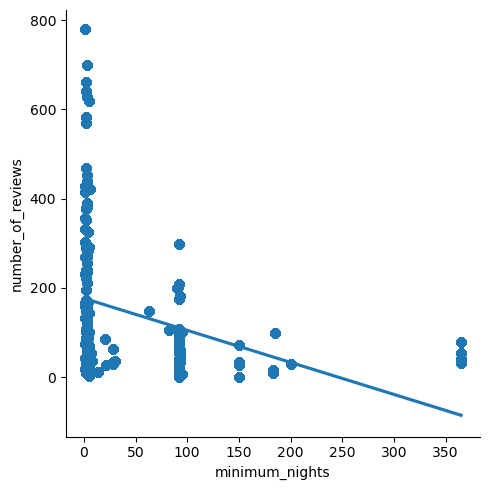

In [26]:
# Create a scatterplot for the "Min. Nights" and "Number of Reviews" columns in seaborn
sns.lmplot(x = 'minimum_nights', y = 'number_of_reviews', data = final_selected)

In [27]:
# Flag for Type of Rent
selected_columns = ['minimum_nights', 'number_of_reviews']
final_selected[selected_columns].describe()

,minimum_nights,number_of_reviews
count,60730.000000,60730.000000
mean,41.451243,146.706175
std,69.115407,159.811862
min,1.000000,1.000000
25%,3.000000,38.000000
50%,4.000000,82.000000
75%,92.000000,208.000000
max,365.000000,779.000000


In [28]:
# Create Type of Rent mini-variable 
final_selected.loc[final_selected['minimum_nights'] <= 30, 'rental_simple_type'] = 'Short-Term'
final_selected.loc[(final_selected['minimum_nights'] > 30), 'rental_simple_type'] = 'Long-Term'
final_selected['rental_simple_type'].value_counts(dropna = False)

rental_simple_type
Short-Term    41722
Long-Term     19008
Name: count, dtype: int64

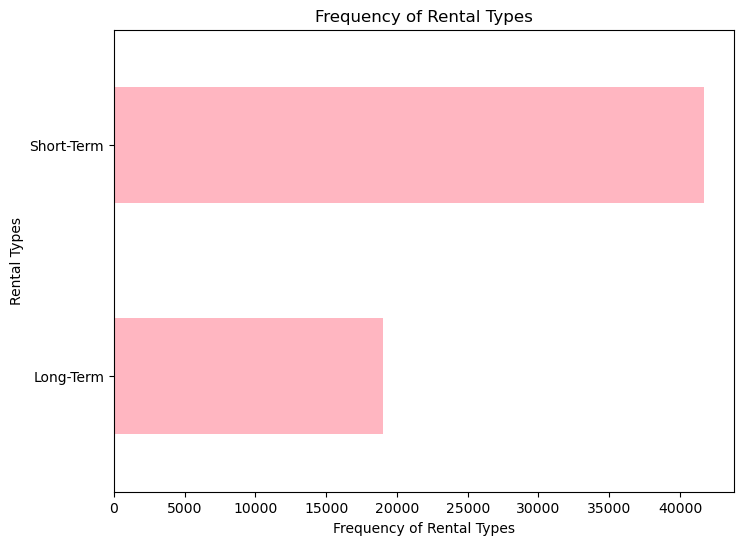

In [29]:
# Calculate the frequency of rental types and create a horizontal bar plot
bar_accommodates_type = final_selected['rental_simple_type'].value_counts().sort_values(ascending=True).plot.barh(color=colors[0], figsize=(8, 6))

# Adding labels for the X and Y axes
plt.xlabel('Frequency of Rental Types')
plt.ylabel('Rental Types')

# Adding a title
plt.title('Frequency of Rental Types')

# Show the plot
plt.show()

In [30]:
# Create Type of Rent variable
final_selected.loc[final_selected['minimum_nights'] <= 2, 'rental_type'] = 'Weekends'
final_selected.loc[(final_selected['minimum_nights'] > 2) & (final_selected['minimum_nights'] <= 7), 'rental_type'] = 'Weekly-Vacation'
final_selected.loc[(final_selected['minimum_nights'] > 7) & (final_selected['minimum_nights'] <= 30), 'rental_type'] = 'Monthly-Vacation'
final_selected.loc[(final_selected['minimum_nights'] > 30), 'rental_type'] = 'Long-Term'
final_selected['rental_type'].value_counts(dropna = False)

rental_type
Weekly-Vacation     23935
Long-Term           19008
Weekends            14971
Monthly-Vacation     2816
Name: count, dtype: int64

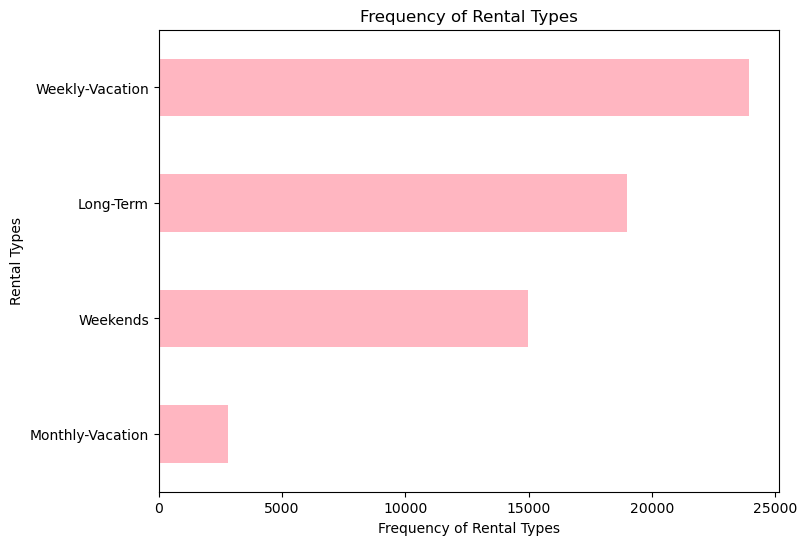

In [31]:
# Calculate the frequency of rental types and create a horizontal bar plot
bar_accommodates_type = final_selected['rental_type'].value_counts().sort_values(ascending=True).plot.barh(color=colors[0], figsize=(8, 6))

# Adding labels for the X and Y axes
plt.xlabel('Frequency of Rental Types')
plt.ylabel('Rental Types')

# Adding a title
plt.title('Frequency of Rental Types')

# Show the plot
plt.show()

In [32]:
# Create Review Level
final_selected.loc[final_selected['number_of_reviews'] < 50, 'review_level'] = 'Low Reviewed'
final_selected.loc[(final_selected['number_of_reviews'] >= 50) & (final_selected['number_of_reviews'] < 100), 'review_level'] = 'Mid Reviewed'
final_selected.loc[(final_selected['number_of_reviews'] >= 100), 'review_level'] = 'Highly Reviewed'
final_selected['review_level'].value_counts(dropna = False)

review_level
Highly Reviewed    27995
Low Reviewed       19360
Mid Reviewed       13375
Name: count, dtype: int64

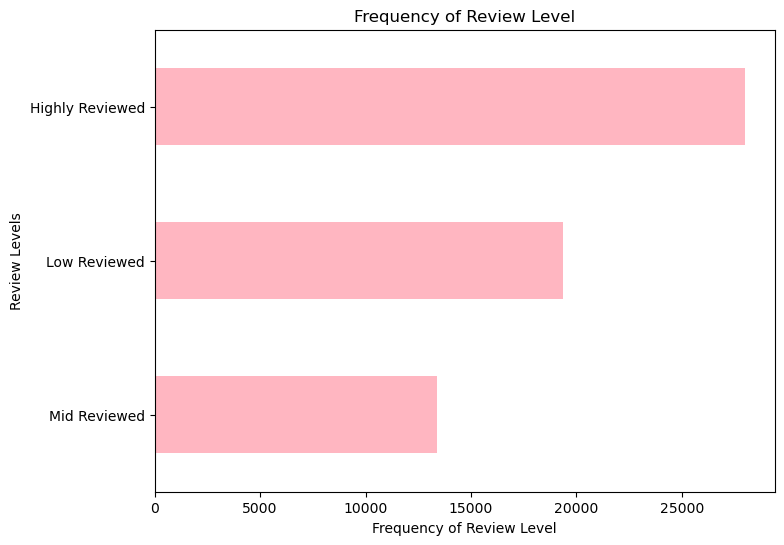

In [33]:
# Calculate the frequency of review level and create a horizontal bar plot
bar_accommodates_type = final_selected['review_level'].value_counts().sort_values(ascending=True).plot.barh(color=colors[0], figsize=(8, 6))

# Adding labels for the X and Y axes
plt.xlabel('Frequency of Review Level')
plt.ylabel('Review Levels')

# Adding a title
plt.title('Frequency of Review Level')

# Show the plot
plt.show()

In [34]:
# Crosstab Price_Accommodates
crosstab_review_rentaltype_prop = pd.crosstab(index=final_selected['rental_type'],
                             columns=final_selected['review_level'],
                             normalize='columns')*100
crosstab_review_rentaltype_prop

review_level,Highly Reviewed,Low Reviewed,Mid Reviewed
rental_type,,,
Long-Term,13.831041,49.090909,42.108411
Monthly-Vacation,0.000000,10.909091,5.263551
Weekends,40.903733,10.909091,10.527103
Weekly-Vacation,45.265226,29.090909,42.100935


Text(0, 0.5, 'Rental Types')

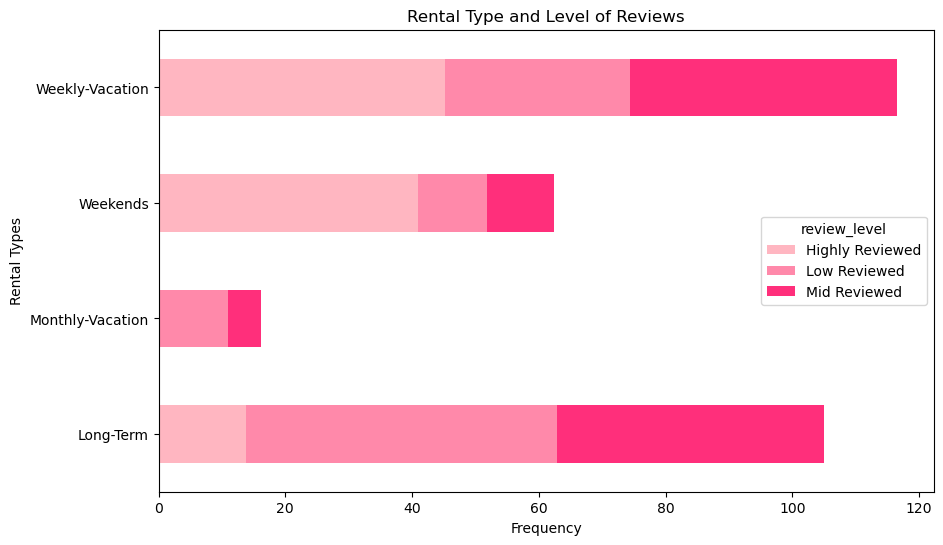

In [35]:
# Bar Chart: Type of Products per Age Group (100% Stacked Column)
bar_Price_Accommodates = crosstab_review_rentaltype_prop.plot.barh(stacked=True, 
                                                  title='Rental Type and Level of Reviews',
                                                  color=colors, 
                                                  figsize=(10, 6))
# Add title to axis Y
plt.xlabel('Frequency')
plt.ylabel('Rental Types')

## 3.3. Pair Plots:

# Reindex dataset for visualisation purpose
final_selected.reset_index(inplace=True)
final_selected['index'] = range(1, len(final_selected) + 1)

In [36]:
# Create subset without any "long Term Rentals"
short_term = final_selected.loc[final_selected['rental_type'] != 'Long-Term']
short_term.shape

(41722, 14)

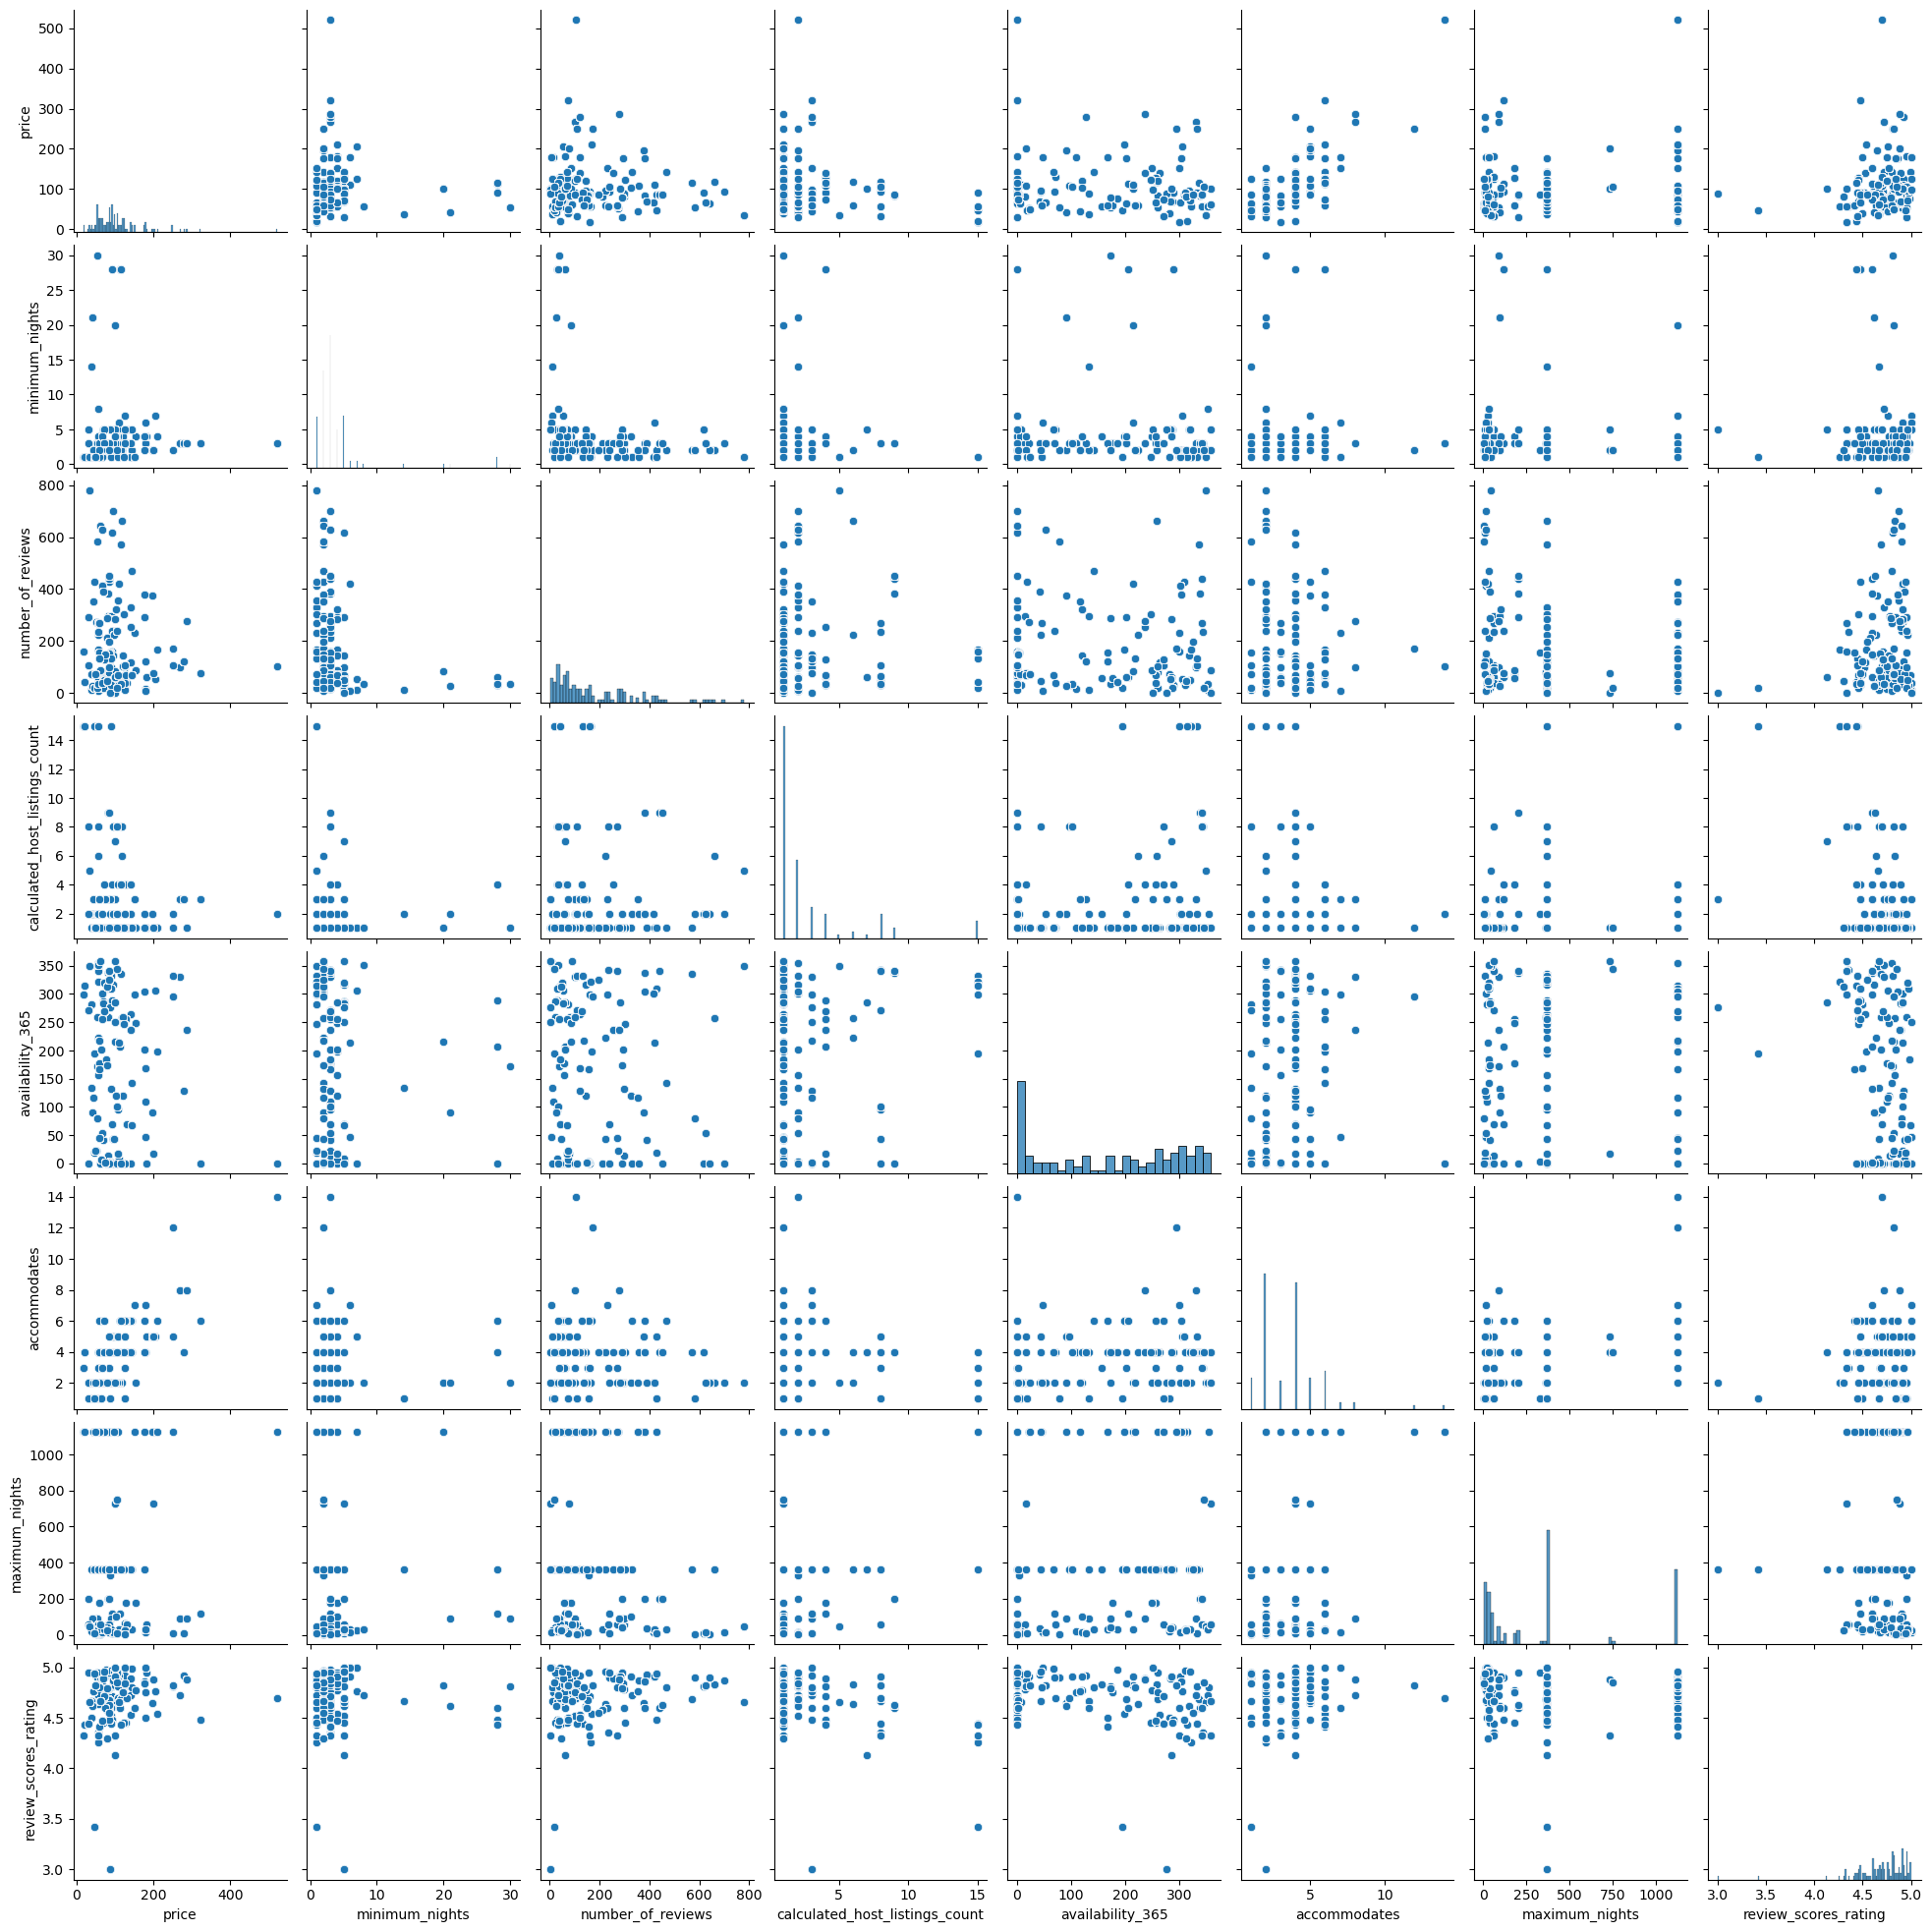

In [37]:
# Create a pair plot 
g = sns.pairplot(short_term)

The scatterplots show that there’s, perhaps, a close relationship between “Price” and "Minimum nights" and "Price" and " Review Scores". Also there is a possible relationship between "Number of Reviews" and "Minimum Nights". 

## 3.4. Categorical Plots:

### 3.4.1 Price and Accommodates

<Axes: xlabel='price', ylabel='price'>

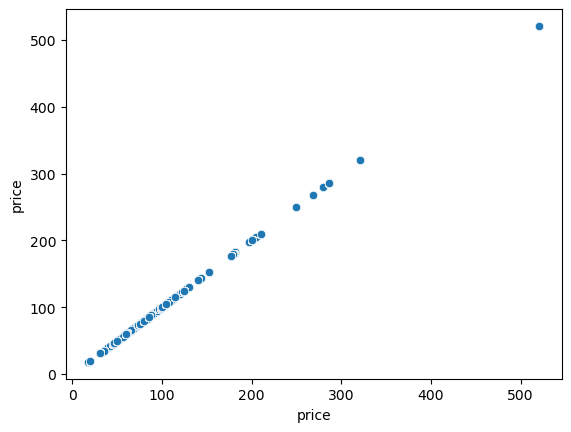

In [38]:
# Redo scatterplot without outliers
sns.scatterplot(x = 'price', y = 'price', data = short_term)

There is an outlier in price > 400. I will mark it as missing.

<Axes: xlabel='price', ylabel='price'>

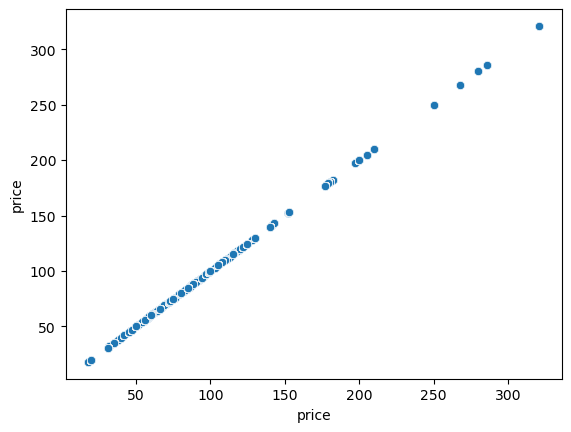

In [39]:
# Mark outliers as Missing
short_term.loc[short_term['price'] > 400, 'price'] = np.nan
# Redo scatterplot without outliers
sns.scatterplot(x = 'price', y = 'price', data = short_term)

<Axes: xlabel='price', ylabel='Count'>

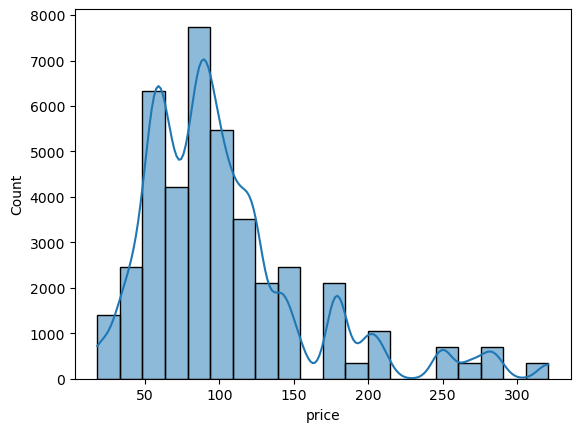

In [40]:
# Use a histogram to visualize the distribution of the variable price
sns.histplot(short_term['price'], bins = 20, kde = True)

The peak of the distribution in the range 50-125€ per night. They belong to the price segment "low-priced" and "mid-priced". 

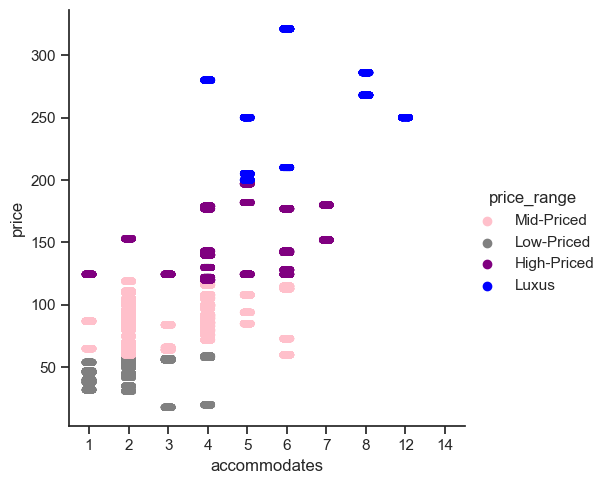

In [41]:
# Create a categorical plot in seaborn using the price categories created above
sns.set(style="ticks")
g = sns.catplot(x="accommodates", y="price", hue="price_range", data=short_term, palette={'High-Priced': 'purple', 'Luxus': 'blue', 'Mid-Priced': 'pink', 'Low-Priced': 'grey'})

The low priced are for less than 4 accommodates. Meanwhile, the luxus ones are for more than 4. High-priced and Mid-priced are more variables.

## 3.4.2 Price and Review Scores

<Axes: xlabel='review_scores_rating', ylabel='Count'>

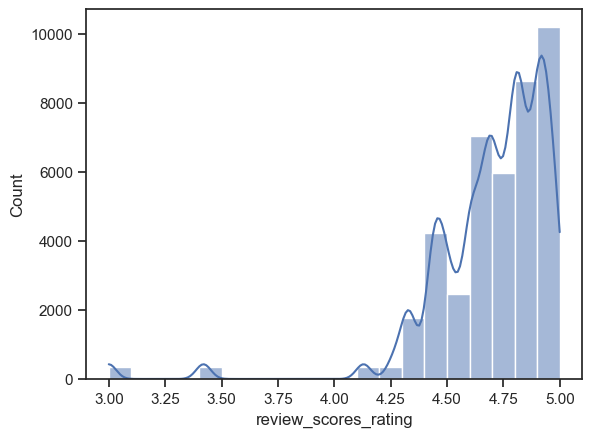

In [42]:
# Use a histogram to visualize the distribution of the variable review_score
sns.histplot(short_term['review_scores_rating'], bins = 20, kde = True)

The most of the listings have a score review greater than 4.5. It seems to be too positive, beside some listings with 3. There is no listing with score less than 3. Therefore, I will not go deeper in the analysis of the review score. 

In [43]:
# Create Rating Flag
final_selected.loc[final_selected['review_scores_rating'] < 2, 'rating'] = 'Horrible'
final_selected.loc[(final_selected['review_scores_rating'] >= 2) & (final_selected['number_of_reviews'] < 4), 'rating'] = 'Satisfactory'
final_selected.loc[(final_selected['review_scores_rating'] >= 4), 'rating'] = 'Excellent'
final_selected['rating'].value_counts(dropna=False)

rating
Excellent       59674
Horrible          352
nan               352
Satisfactory      352
Name: count, dtype: int64

## 3.4.3 Price and Minimum Nights

<Axes: xlabel='minimum_nights', ylabel='Count'>

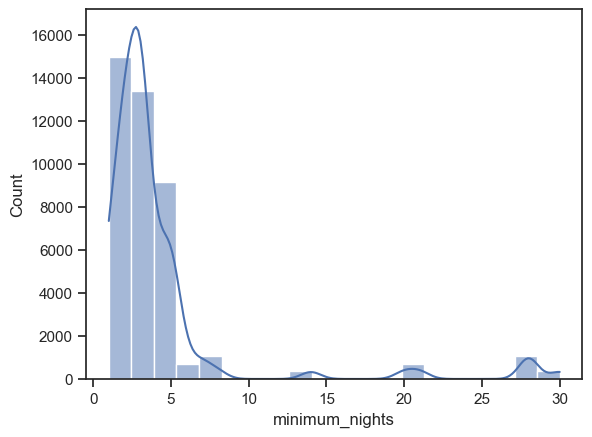

In [44]:
# Use a histogram to visualize the distribution of the variable minimum_nights
sns.histplot(short_term['minimum_nights'], bins = 20, kde = True)

The peak distribution is between 1 and 8 nights. It is accurate due to the filter short-term rental we applied.

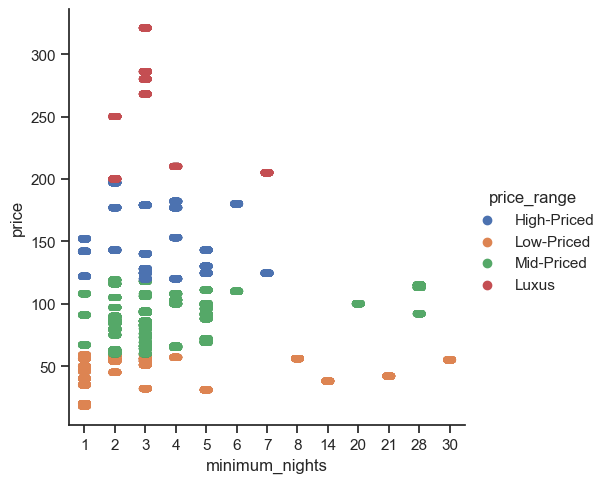

In [45]:
# Create a categorical plot in seaborn using the price categories created above
sns.set(style="ticks")
g = sns.catplot(x="minimum_nights", y="price", hue="price_range", data=short_term)

The Luxus and High-Priced are have less than a week as minimum number of nights. The lower the price is, more diverse the minimum number of nights is. 

## 3.4.4 Minimum Nights and Number of Reviews

<Axes: xlabel='number_of_reviews', ylabel='Count'>

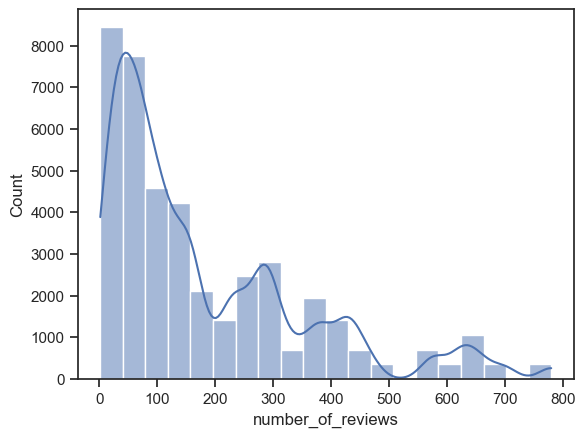

In [46]:
# Use a histogram to visualize the distribution of the variable review_score
sns.histplot(short_term['number_of_reviews'], bins = 20, kde = True)

The peak distribution is less than 100 reviews. However, we see the distribution is diverse from 100 to 800 reviews.

In [47]:
# Create Type of Rent variable
short_term.loc[short_term['minimum_nights'] <= 2, 'rental_type'] = 'Weekends'
short_term.loc[(short_term['minimum_nights'] > 2) & (final_selected['minimum_nights'] <= 7), 'rental_type'] = 'Weekly-Vacation'
short_term.loc[(short_term['minimum_nights'] > 7) & (final_selected['minimum_nights'] <= 30), 'rental_type'] = 'Monthly-Vacation'
short_term.loc[(short_term['minimum_nights'] > 30), 'rental_type'] = 'Long-Term'
short_term['rental_type'].value_counts(dropna = False)

rental_type
Weekly-Vacation     23935
Weekends            14971
Monthly-Vacation     2816
Name: count, dtype: int64

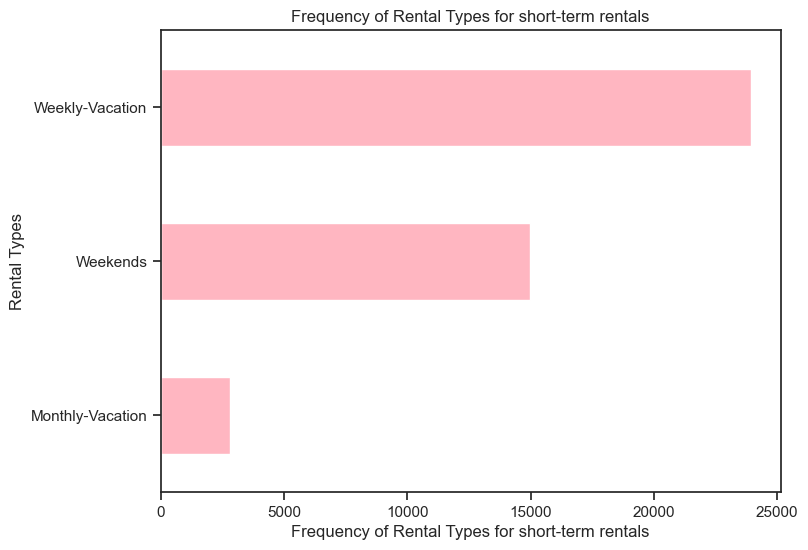

In [48]:
# Calculate the frequency of rental_type for short-term rentals and create a horizontal bar plot
bar_accommodates_type = short_term['rental_type'].value_counts().sort_values(ascending=True).plot.barh(color=colors[0], figsize=(8, 6))

# Adding labels for the X and Y axes
plt.xlabel('Frequency of Rental Types for short-term rentals')
plt.ylabel('Rental Types')

# Adding a title
plt.title('Frequency of Rental Types for short-term rentals')

# Show the plot
plt.show()

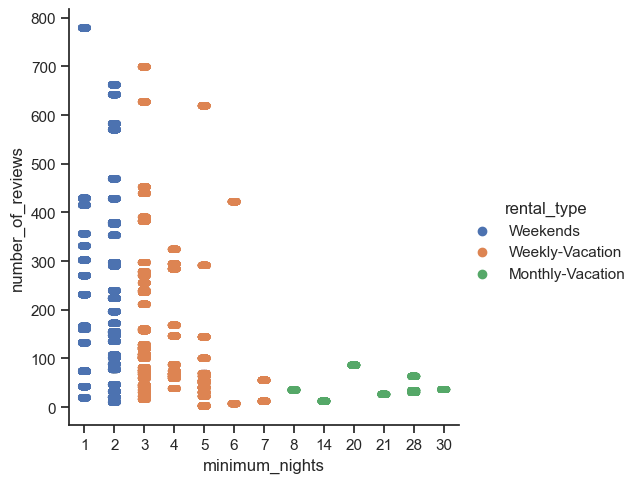

In [49]:
# Create a categorical plot in seaborn using the price categories created above
sns.set(style="ticks")
g = sns.catplot(x="minimum_nights", y="number_of_reviews", hue="rental_type", data=short_term)

The higher is the minimum number of nights, less number of review a listing has. It is normal because the number of times a listing may be booked is higher if the minimum nights is lower. These listings are probably booked for shorter durations, leading to a higher likelihood of receiving more reviews. When multiple guests stay in a unit within a month, it results in a greater number of reviews compared to scenarios where only one renter stays, resulting in just one review for that month.

# 4. Questions

##### If a host is highly rated or superhost, it will be less available
After analysing the rating_scores variable, I found out that the most of the listings are highly rated (more than 4 points). So the analysis of the availability versus rating level of a listing will not give any interesting insight, since the majority is highly rated.
So the hypothesis related with review-ratings will not be answered, at least we analyse the review dataset in the future:
  - If a listing has a shorter response time from the host, then it will have higher review ratings.
  - If the number of reviews for a listing is high, then the overall rating for that listing will also be high.

# 5. Hypothesis

      1. If a neighboughood has more tourist interest, the listing density and the price will be high
      2. If there are more short-term listing per region, there will be more deficit of housing
      3. If the number of minimum nights is higher, the price will be lower
      4. If a listing has a high number of reviews, the availability will be lower because its popularity
      5. If a listing has a high number of accommodates, the price will be higher than for couple or solo guests.
      6. If the neighboughood is outside the ring, the availability will be higher.

# 6. Export Dataset

In [50]:
# final_selected: Export df only with numerical columns and new flags
final_selected.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'final_selected.pkl'))

In [51]:
# short_term: Export df only with numerical columns, new flags and just for short_term (rental_type <> Long-term)
short_term.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'short_term.pkl'))

In [52]:
#final_df

## Checking Duplicates
final_selected_dups = final_selected[final_selected.duplicated()]

## Dropping duplicates
final_selected_no_dups = final_selected.drop_duplicates()
final_selected_no_dups.shape

(173, 15)

In [53]:
# Merge Flag new columns from final_selected to final_df dataset
final_selected_merged = pd.merge(final_df, final_selected_no_dups[['id', 'rental_simple_type', 'price_range', 'accommodates_type', 'rental_type', 'review_level']], on='id', how='right')
final_selected_merged.head()

,id,date,month,available,season,name,host_id,host_name,neighbourhood_group,neighbourhood,...,review_scores_location,review_scores_value,instant_bookable,Population,Deficit housing,rental_simple_type,price_range,accommodates_type,rental_type,review_level
0,22438,2024-01-01,January,f,Winter,Rental unit in Berlin ¬∑ ‚òÖ4.70 ¬∑ 2 bedrooms...,86159,Javier,Mitte,Brunnenstr. Sued,...,4.63,4.68,f,385748,-19725,Long-Term,Low-Priced,Couples,Long-Term,Highly Reviewed
1,22438,2024-02-01,January,t,Winter,Rental unit in Berlin ¬∑ ‚òÖ4.70 ¬∑ 2 bedrooms...,86159,Javier,Mitte,Brunnenstr. Sued,...,4.63,4.68,f,385748,-19725,Long-Term,Low-Priced,Couples,Long-Term,Highly Reviewed
2,22438,2024-03-01,January,t,Winter,Rental unit in Berlin ¬∑ ‚òÖ4.70 ¬∑ 2 bedrooms...,86159,Javier,Mitte,Brunnenstr. Sued,...,4.63,4.68,f,385748,-19725,Long-Term,Low-Priced,Couples,Long-Term,Highly Reviewed
3,22438,2024-04-01,January,t,Winter,Rental unit in Berlin ¬∑ ‚òÖ4.70 ¬∑ 2 bedrooms...,86159,Javier,Mitte,Brunnenstr. Sued,...,4.63,4.68,f,385748,-19725,Long-Term,Low-Priced,Couples,Long-Term,Highly Reviewed
4,22438,2024-05-01,January,t,Winter,Rental unit in Berlin ¬∑ ‚òÖ4.70 ¬∑ 2 bedrooms...,86159,Javier,Mitte,Brunnenstr. Sued,...,4.63,4.68,f,385748,-19725,Long-Term,Low-Priced,Couples,Long-Term,Highly Reviewed


In [54]:
final_selected_merged.columns

Index(['id', 'date', 'month', 'available', 'season', 'name', 'host_id',
       'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'calculated_host_listings_count',
       'availability_365', 'license', 'host_response_time',
       'host_response_rate', 'host_is_superhost', 'property_type',
       'accommodates', 'maximum_nights', 'first_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'Population',
       'Deficit housing', 'rental_simple_type', 'price_range',
       'accommodates_type', 'rental_type', 'review_level'],
      dtype='object')

In [55]:
final_selected_merged.shape

(60730, 42)

In [56]:
# Export final_selected_merged as pickel
final_selected_merged.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'final_df_2.pkl'))

In [57]:
# Export final_selected_merged as xlsx
final_selected_merged.to_excel(os.path.join(path, '02 Data','Prepared Data', 'final_df_2.xlsx'))